In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
from matplotlib.patches import Ellipse
from scipy.io import arff
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [15]:
# 2. Функция для создания эллипса
def get_confidence_ellipse(mean, cov, confidence, ax, **kwargs):
    # Вычисляем масштаб для эллипса (квантиль распределения Хи-квадрат)
    scale = np.sqrt(chi2.ppf(confidence, df=2))
    
    # Находим собственные значения и векторы
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
    
    # Углы и размеры эллипса
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 2 * scale * np.sqrt(eigenvalues)
    
    # Построение эллипса
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

In [11]:
column_names = [
    "FixedAcidity", "VolatileAcidity", "CitricAcid", "ResidualSugar", "Chlorides",
    "FreeSulfurDioxide", "TotalSulfurDioxide", "Density", "PH", "Sulphates", "Alcohol", "Quality"
]

df = pd.read_csv(
    "winequality-red.dat",
    comment='@',
    header=None,  
    names=column_names,  
    skip_blank_lines=True  
)

df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [30]:
columns = df.columns
columns = columns[:-1]
print("Колличество столбцов:", len(columns))
columns


Колличество столбцов: 11


Index(['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar',
       'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH',
       'Sulphates', 'Alcohol'],
      dtype='object')

Постром 90%, 95%, 99% предективные эллипсы для всех возможных 
пар полей, кроме поля, содержащего классификацию наблюдений.  

C:\Users\nev1L\AppData\Local\Temp\ipykernel_3056\1415083018.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 3))


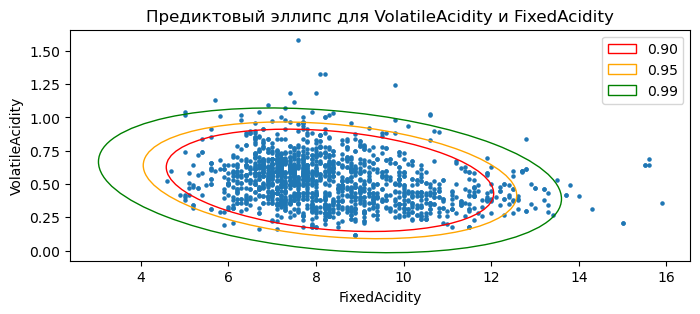

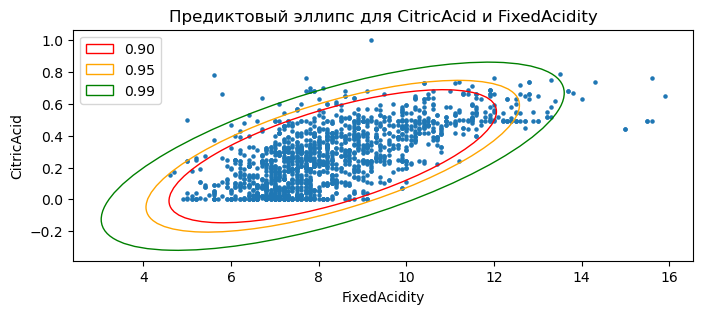

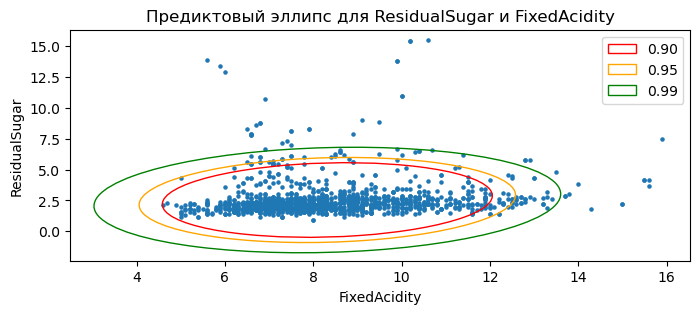

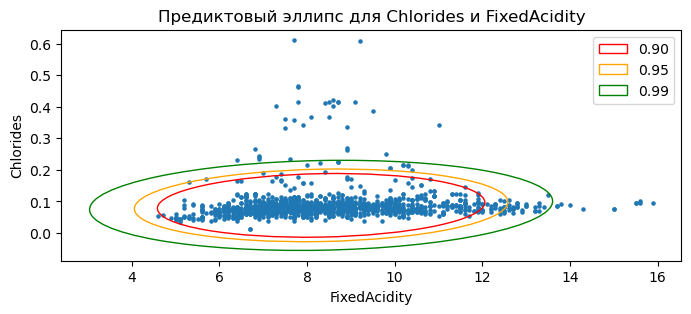

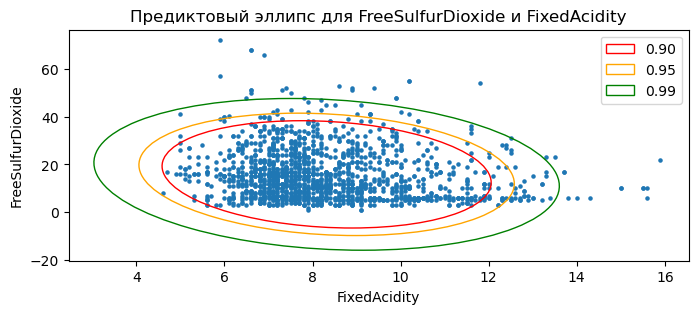

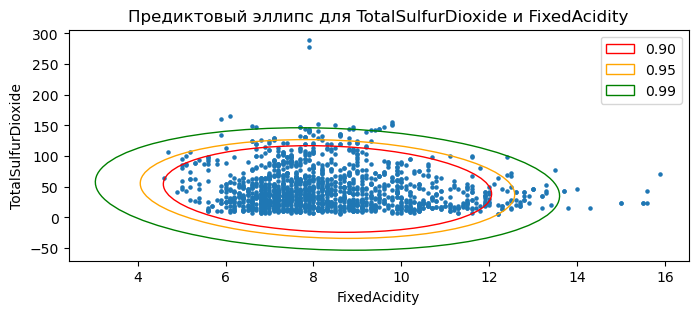

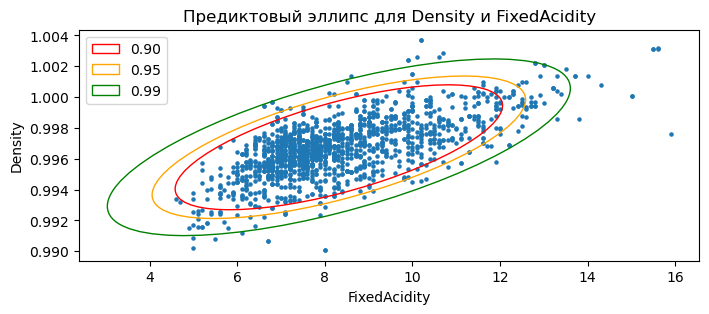

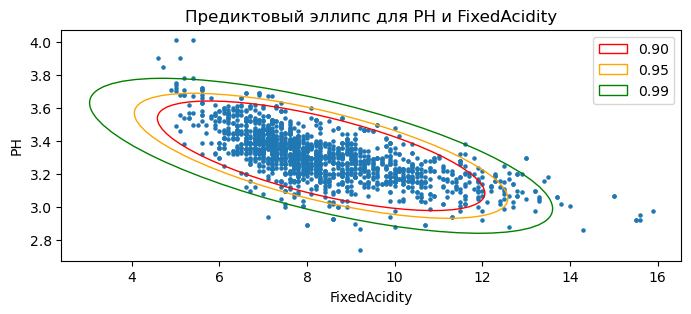

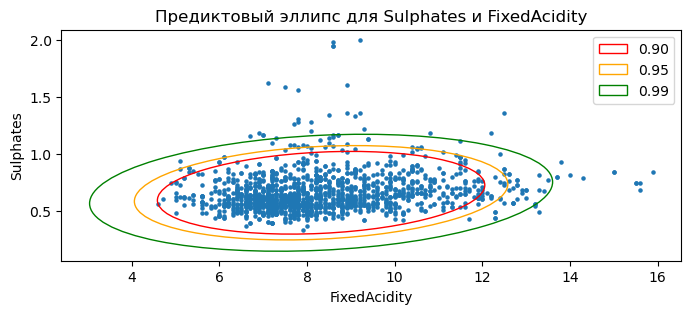

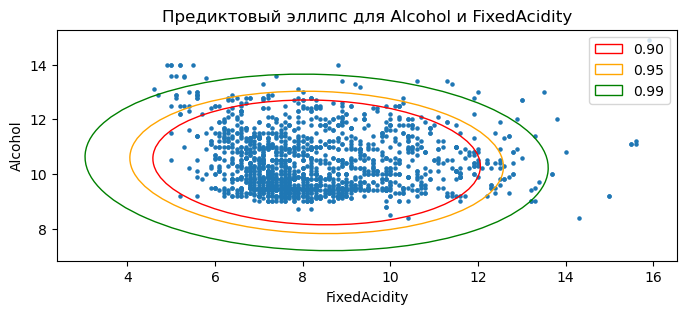

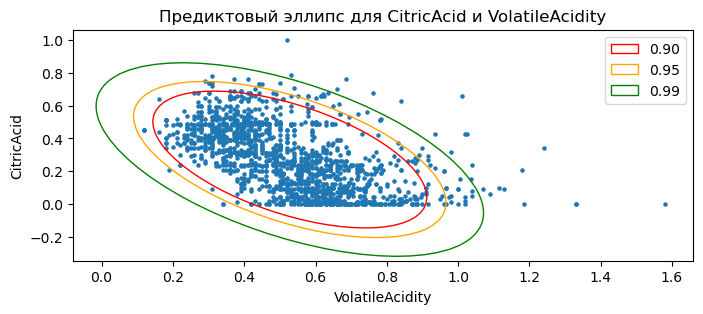

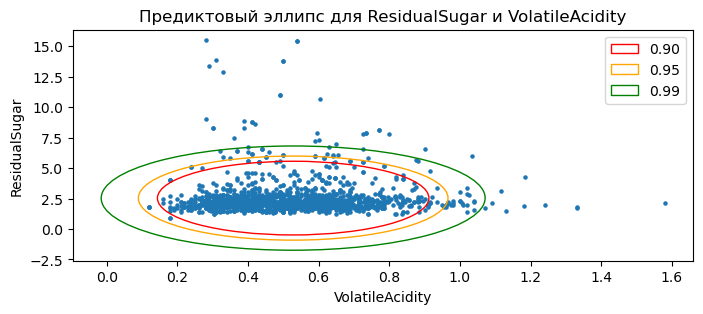

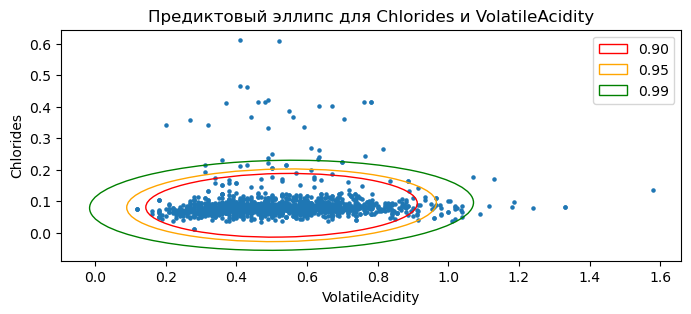

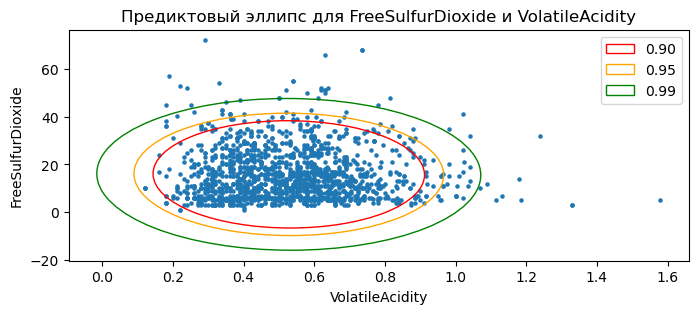

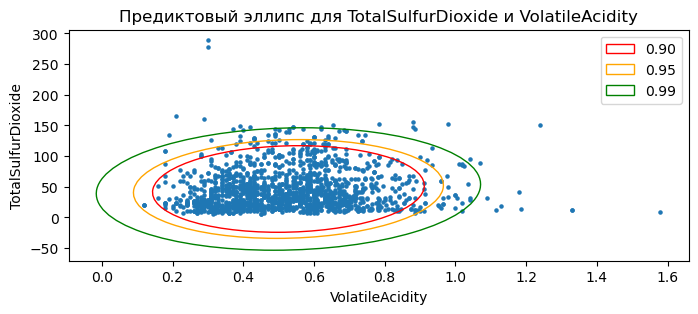

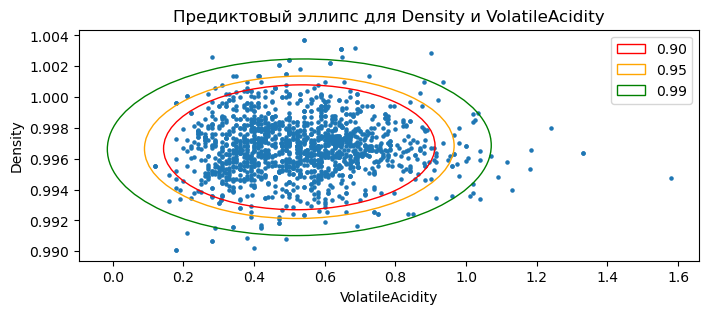

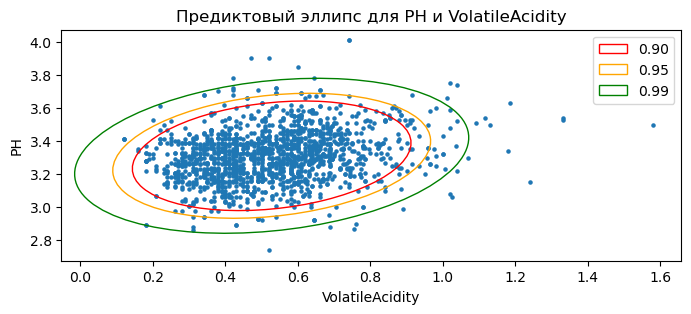

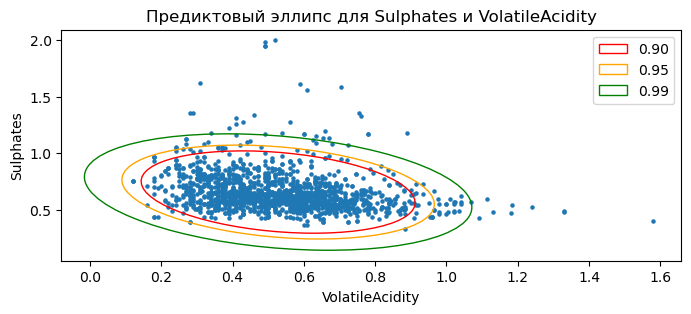

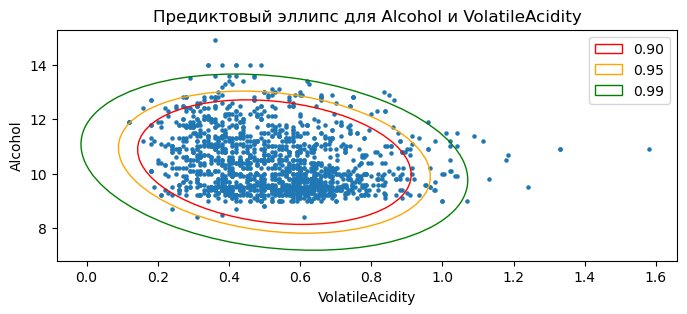

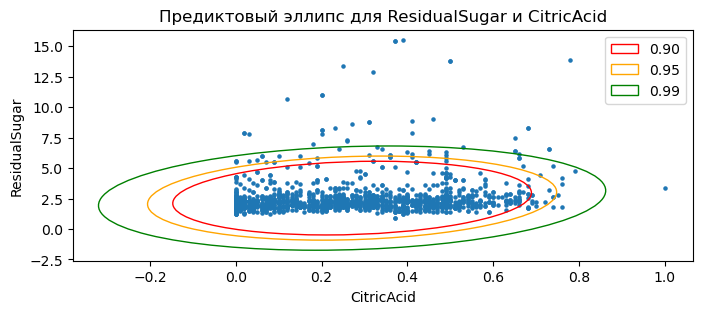

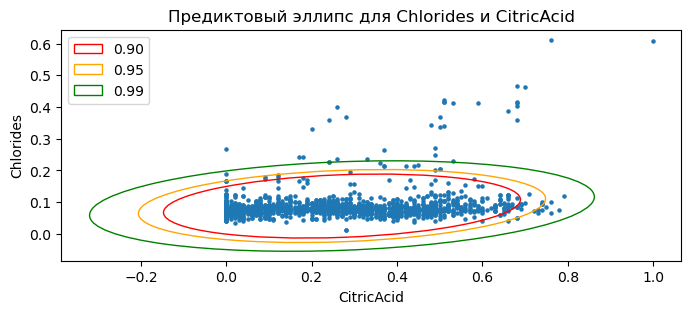

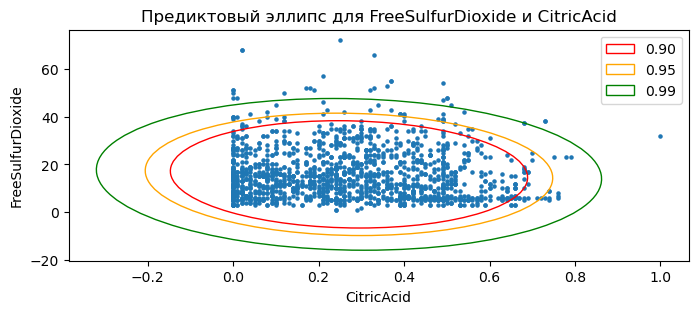

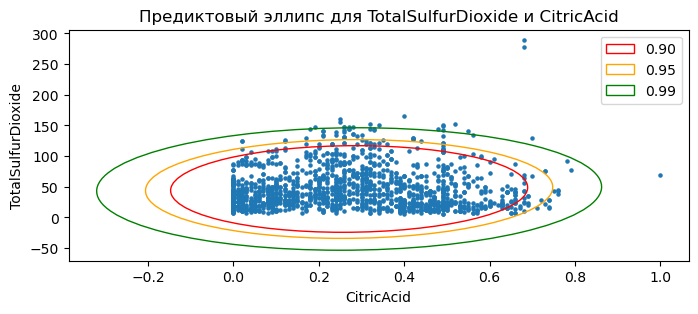

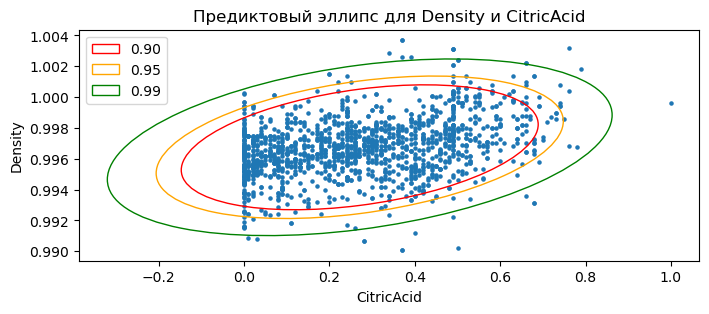

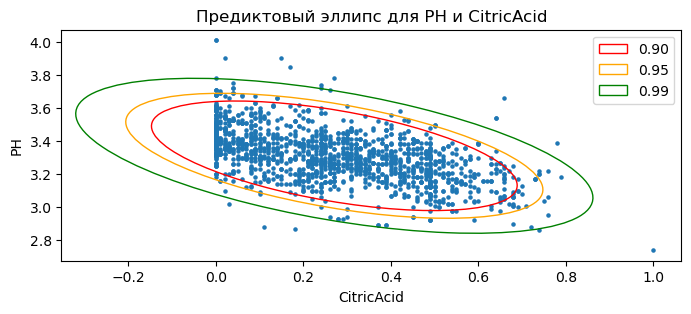

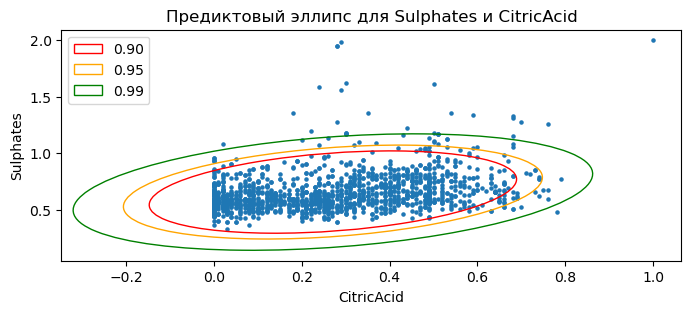

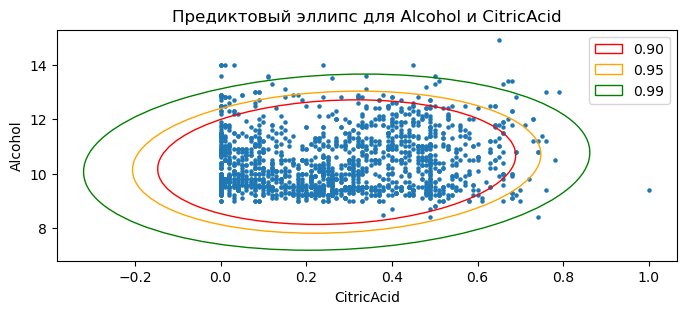

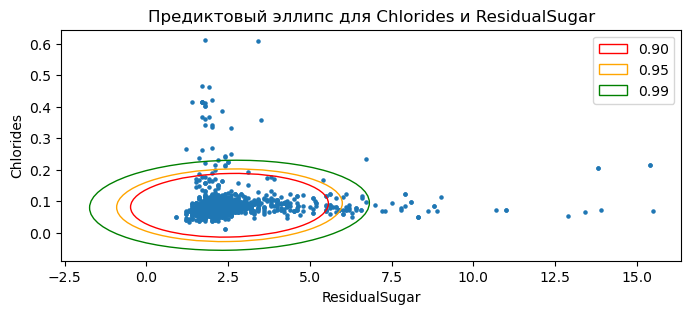

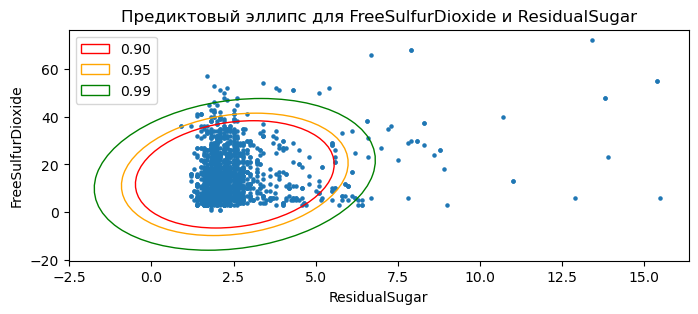

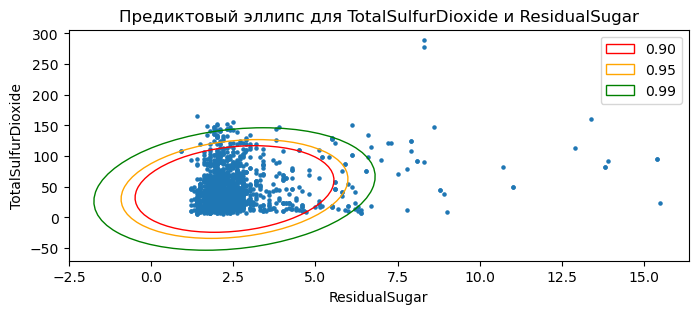

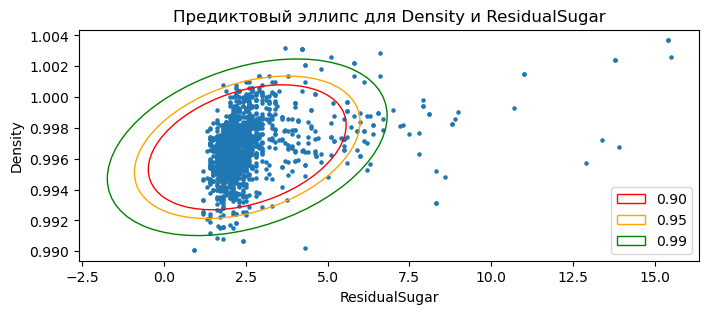

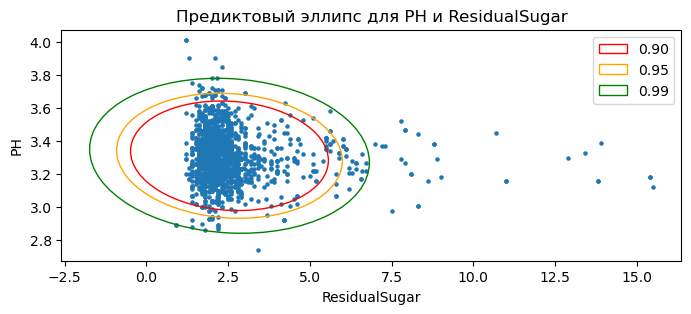

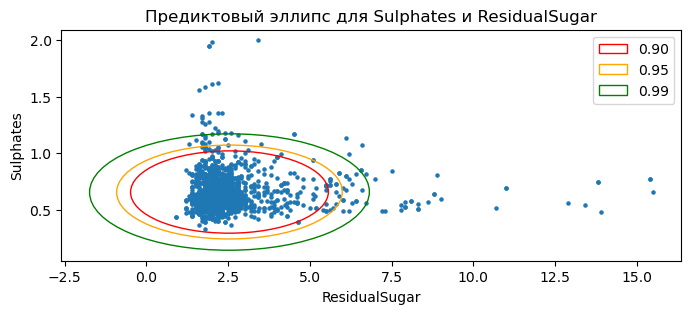

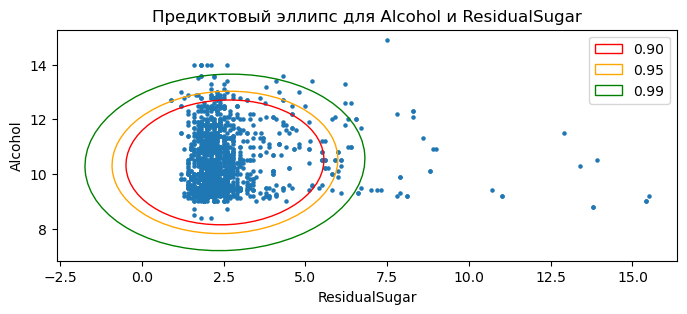

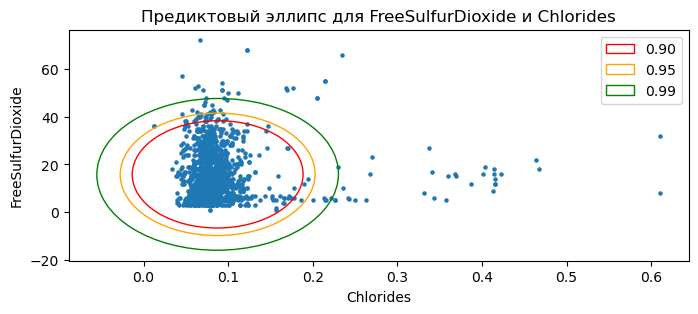

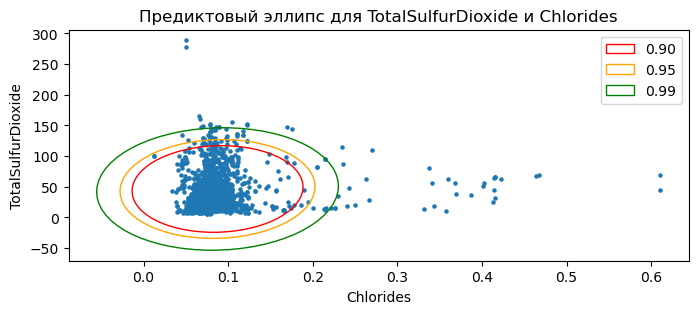

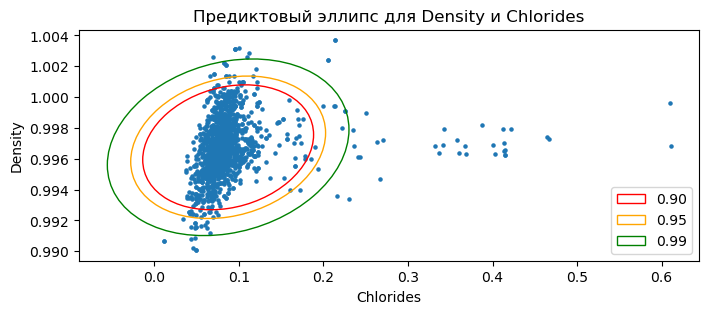

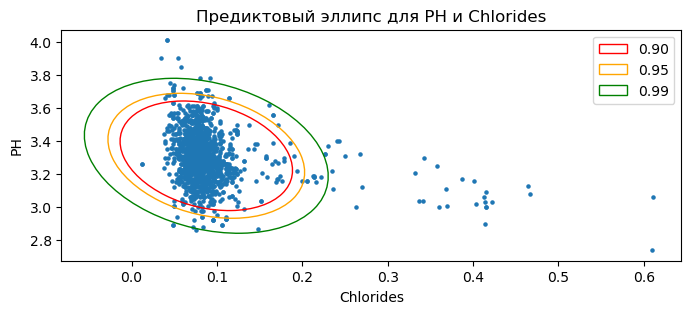

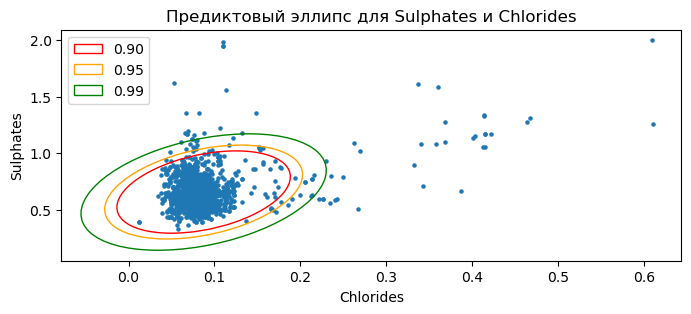

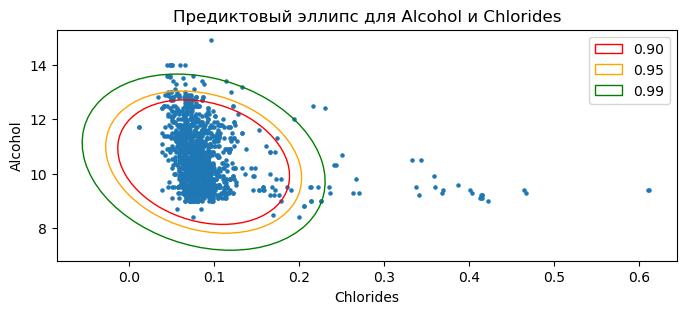

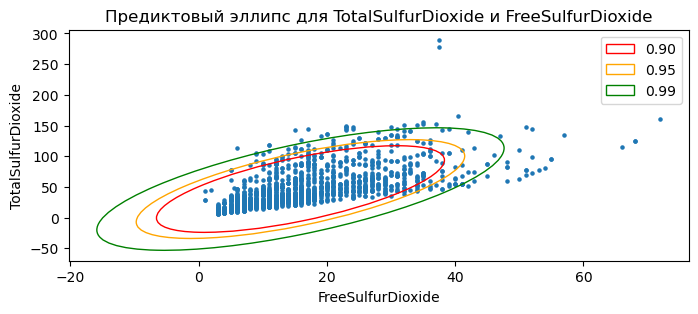

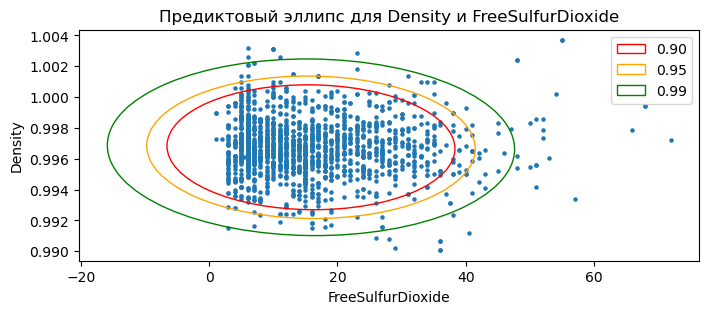

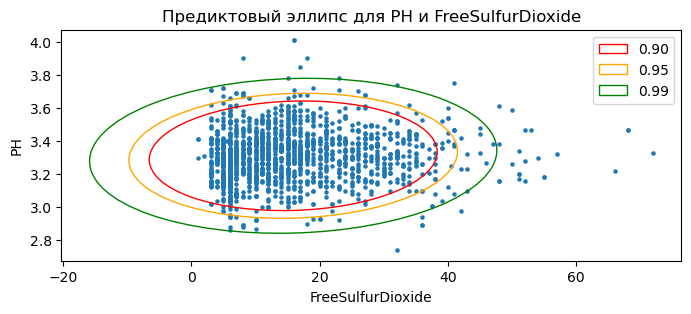

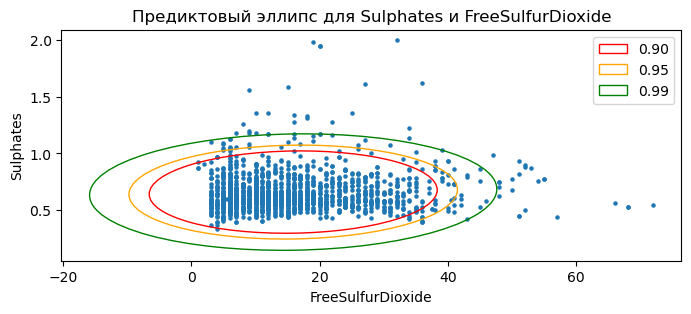

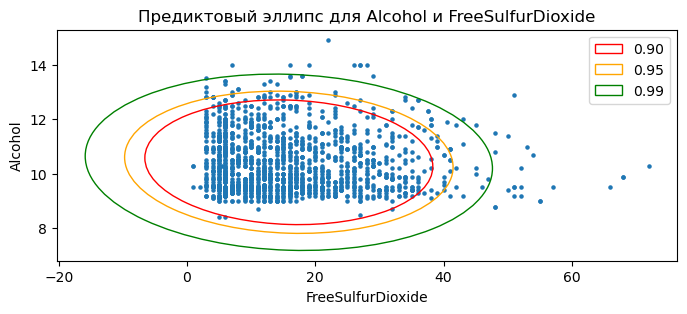

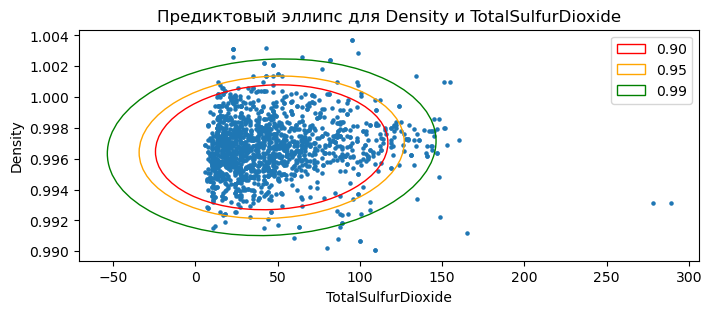

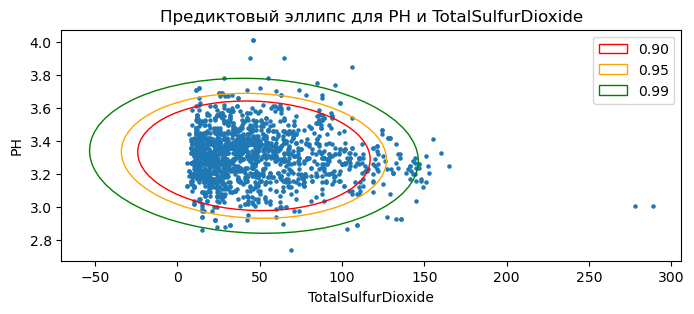

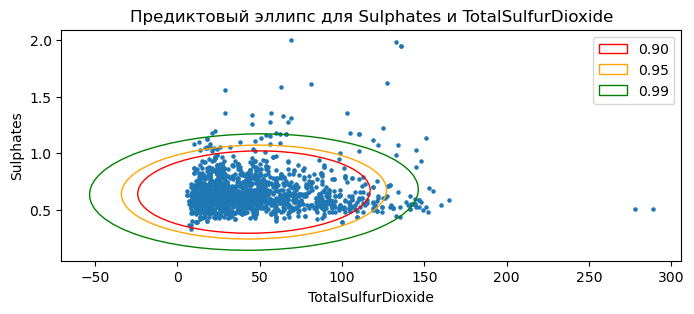

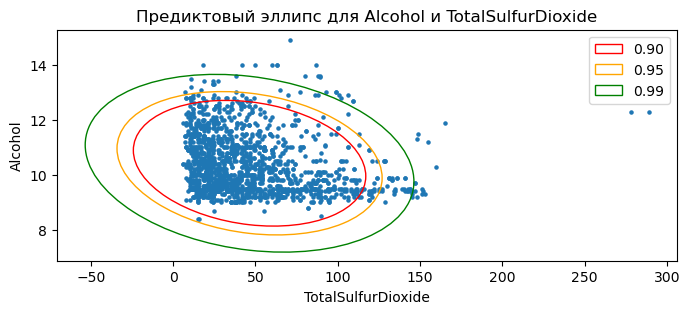

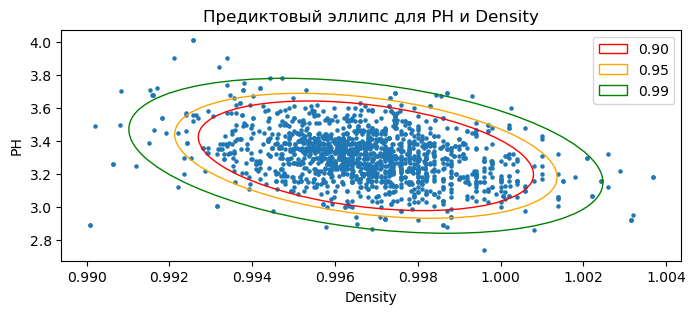

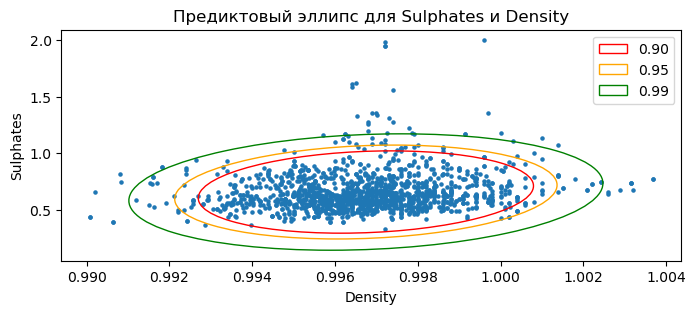

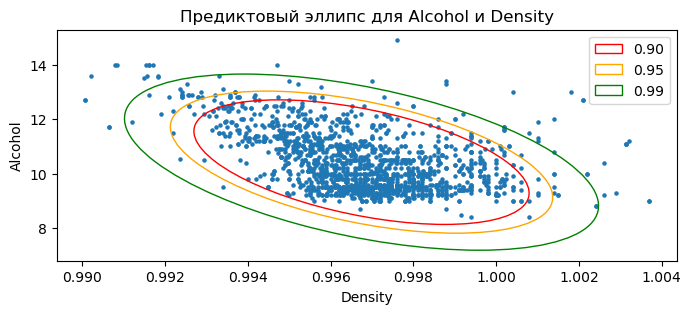

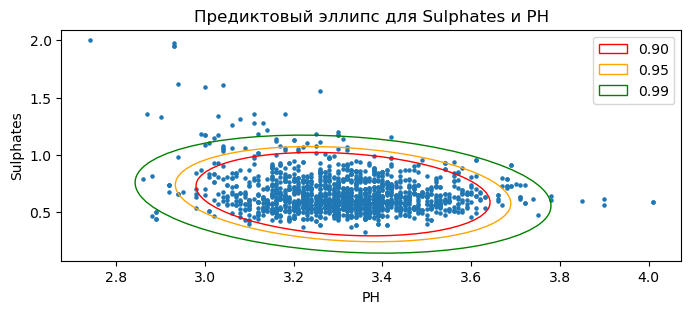

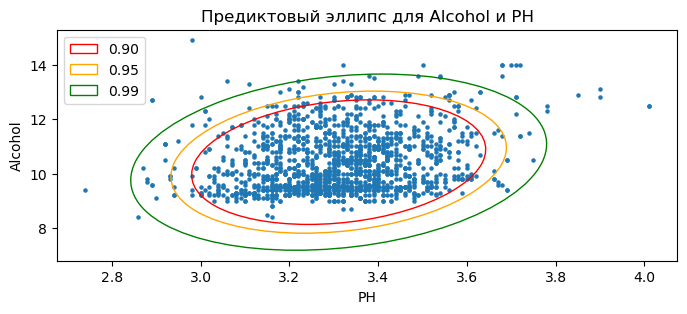

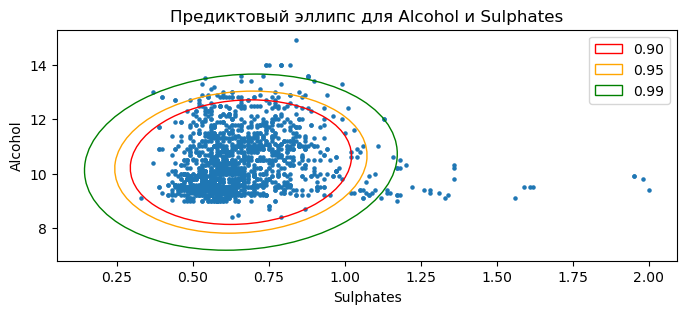

In [29]:
n = 0
for i in range(len(columns)):
    for j in range(i + 1,len(columns)):
        fig, ax = plt.subplots(figsize=(8, 3))
        ax.scatter(df[columns[i]], df[columns[j]], s=5)
        
        mean = df[[columns[i], columns[j]]].mean().values
        cov = df[[columns[i], columns[j]]].cov().values
        
        get_confidence_ellipse(mean, cov, 0.9, ax, edgecolor="red", label="0.90", facecolor='none')
        get_confidence_ellipse(mean, cov, 0.95, ax, edgecolor="orange", label="0.95", facecolor='none')
        get_confidence_ellipse(mean, cov, 0.99, ax, edgecolor="green", label="0.99", facecolor='none')
        
        ax.set_xlabel(columns[i])
        ax.set_ylabel(columns[j])
        ax.legend()
        plt.title("Предиктовый эллипс для " + columns[j] + " и " + columns[i])
        n += 1

In [32]:
print("Колличесвто графиков:", n)

Колличесвто графиков: 55


Выполним стандартизацию всех полей, кроме поля, содержащего 
классификацию наблюдений.

In [36]:
scaler = preprocessing.StandardScaler()
df = df[columns]
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=columns)
df_std

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


 Выполним расчёт главных компонент для загруженного набора 
данных, используя все числовые поля, кроме поля, содержащего 
классификацию наблюдений.

In [50]:
pca = PCA(n_components=11)

df_pca = pca.fit_transform(df_std)
pd.DataFrame(df_pca, columns=["Component №" + str(i) for i in range(1,12)] )

,Component №1,Component №2,Component №3,Component №4,Component №5,Component №6,Component №7,Component №8,Component №9,Component №10,Component №11
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707,0.062833,-0.138142
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857,-0.187442,-0.118229
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577,-0.130393,0.316714
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866,-0.971524,0.356851,-0.053382
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640,-1.058135,0.478879,-0.241258
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382,-0.808773,0.242248,-0.402910
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876,-0.612248,0.779404,0.040923


Посмотрим информативность каждой главной компаненты

In [58]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

Посмотрим на кумулятотивную сумму главных компонент

In [57]:
np.cumsum(pca.explained_variance_ratio_)

array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
       1.        ])

Т.о. для того чтобы информативность была 95% нам потребуются 9 главных компонент